In [1]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import plotly.express as px
matplotlib.rcParams["figure.figsize"]=(20,10)
df1=pd.read_csv("/content/drive/MyDrive/seattle-weather.csv")
df1.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df1.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df1.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
df1['weather']=LabelEncoder().fit_transform(df1['weather'])

In [10]:
df1.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [11]:
df1.duplicated().sum()

0

In [13]:
df1['weather'].value_counts()

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

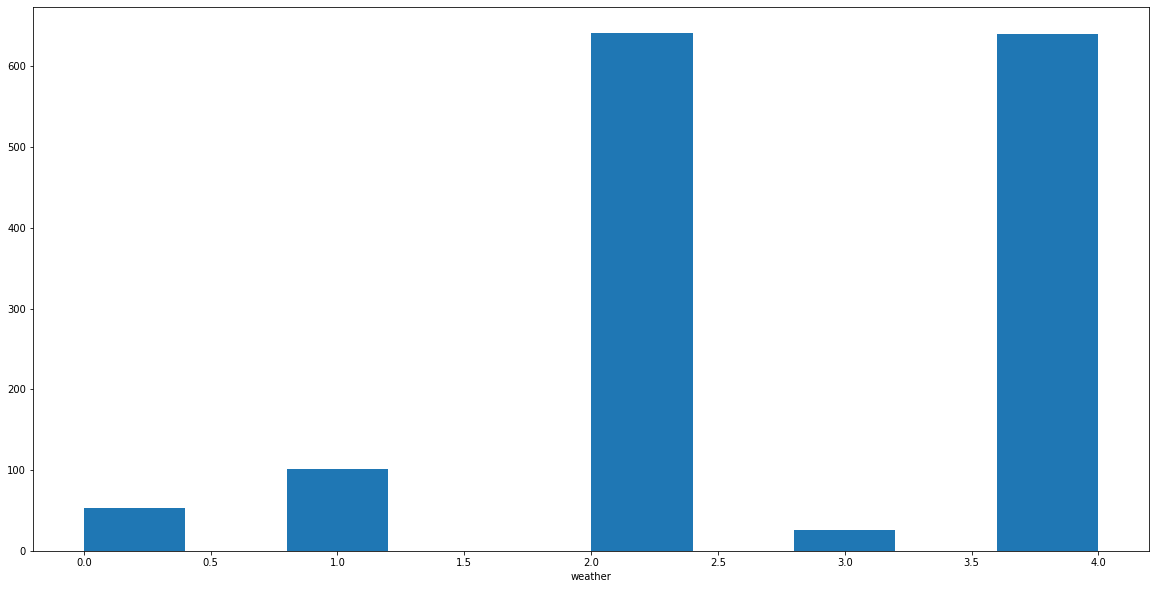

In [29]:
plt.hist(df1['weather'])
plt.xlabel('weather')

plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


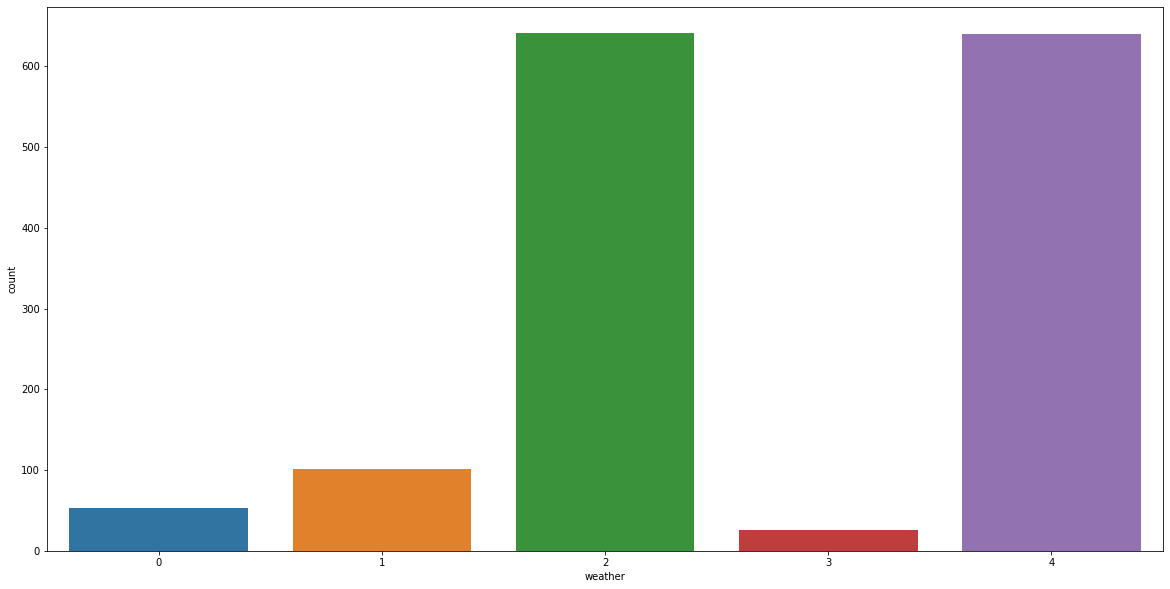

In [30]:
sns.countplot(df1['weather'])
plt.show()

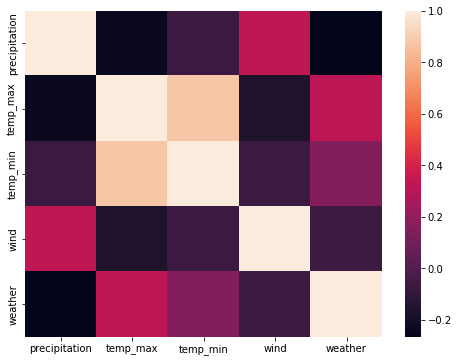

In [16]:
fig, axes=plt.subplots(figsize=(8, 6))
sns.heatmap(df1.corr(), ax=axes)

In [21]:
from sklearn.model_selection import train_test_split
features=["precipitation", "temp_max", "temp_min", "wind"]
X=df1[features]
y=df1.weather
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 0)

In [23]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(train_X)
X_test = sc_X.transform(test_X)

In [24]:
#import Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_X, train_y)

GaussianNB()

In [25]:
#making a prediction
y_pred = gnb.predict(test_X)
y_pred

array([4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 3, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 4, 4, 2, 4, 2, 3, 4, 4, 4, 4, 2, 4, 4, 2, 3, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 4, 4, 4, 2, 3, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
cm

array([[  0,   0,   0,   0,  11],
       [  0,   0,   0,   0,  31],
       [  0,   0, 141,   2,  12],
       [  0,   0,   2,   4,   0],
       [  0,   0,   0,   0, 163]])

In [27]:
#accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(test_y, y_pred)
ac

0.8415300546448088

In [18]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model1=DecisionTreeRegressor(random_state=1)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))


Mean Absolute Error: 0.713115


In [20]:
#random forest
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor(random_state=1)
model2.fit(train_X, train_y)
pred2=model2.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred2)))

Mean Absolute Error: 0.694026


In [33]:
#import KNN model from scikitlearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [34]:
#making a prediction
y_pred = knn.predict(test_X)
y_pred

array([4, 2, 2, 4, 0, 2, 2, 2, 4, 2, 4, 2, 0, 4, 0, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 0, 2, 4, 2, 0, 2, 2, 2,
       4, 2, 0, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 2, 2, 2, 1, 4, 1, 1, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       2, 2, 4, 4, 2, 4, 2, 3, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 0, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 1, 4, 2, 4, 4, 1,
       1, 4, 4, 4, 4, 4, 4, 2, 0, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       1, 1, 4, 4, 4, 4, 2, 1, 2, 1, 4, 2, 2, 4, 4, 4, 1, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 2, 4, 2, 0, 4, 0, 3, 2, 2, 2, 1, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       1, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 2, 4, 1, 4, 4, 2, 2, 0, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       1, 4, 2, 1, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
cm

array([[  1,   1,   1,   0,   8],
       [  3,   4,   4,   0,  20],
       [  1,   4, 130,   0,  20],
       [  0,   0,   3,   2,   1],
       [  6,  10,  18,   0, 129]])

In [37]:
#accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(test_y, y_pred)
ac

0.726775956284153